In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 6A9F-0359

 Directory of C:\Users\rokha\Downloads\UrbanSound8K\UrbanSound8K

13-11-2023  03.27 PM    <DIR>          .
13-11-2023  01.39 PM    <DIR>          ..
20-05-2014  12.28 AM            15,364 .DS_Store
13-11-2023  03.09 PM    <DIR>          .ipynb_checkpoints
20-05-2014  12.43 AM    <DIR>          audio
13-11-2023  03.27 PM           169,192 Audio Classification .ipynb
20-05-2014  12.45 AM            26,155 FREESOUNDCREDITS.txt
28-05-2014  07.45 PM    <DIR>          metadata
13-11-2023  03.09 PM    <DIR>          saved_models
04-06-2014  03.40 AM             4,932 UrbanSound8K_README.txt
               4 File(s)        215,643 bytes
               6 Dir(s)  25,644,466,176 bytes free


In [7]:

metadata = pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [8]:
#check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [9]:
#Audio classification data Preprocessing
import librosa
audio_file_path = 'audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [10]:
print(librosa_audio_data)

[-0.00011485 -0.00017083 -0.00017736 ... -0.04609928 -0.04609471
 -0.05099387]


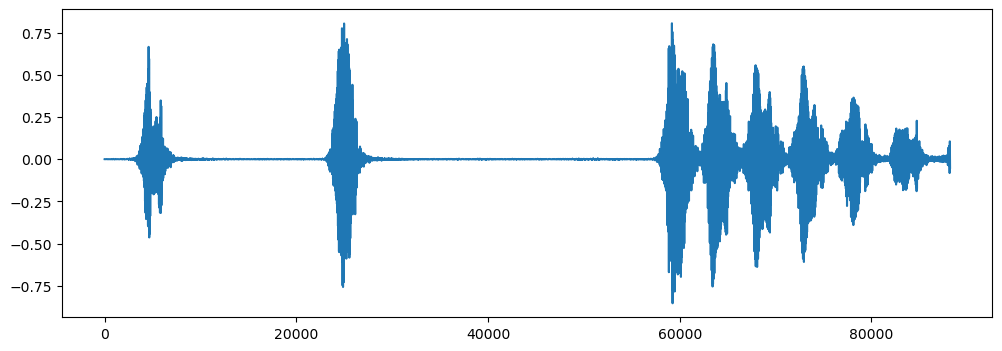

In [11]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

Observation

In [12]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [13]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

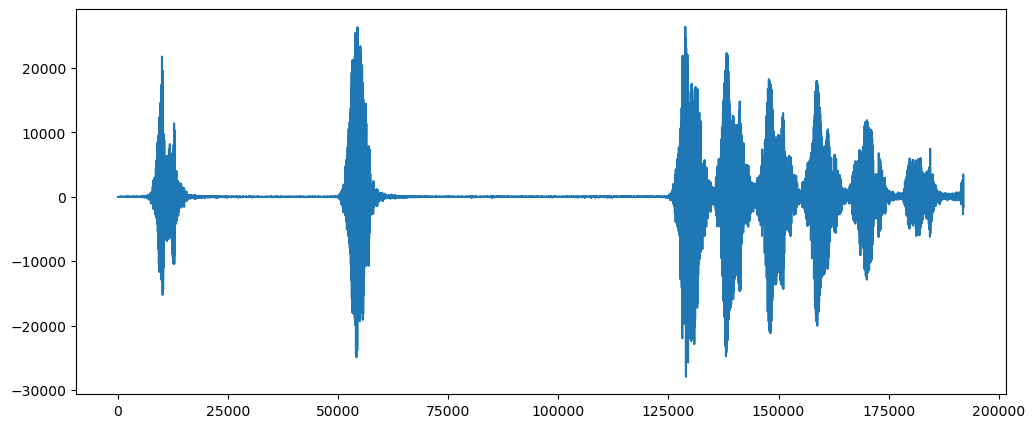

In [14]:
plt.figure(figsize=(12,5))
plt.plot(wave_audio)

Extract features

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [16]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999226e+00,  1.6759441e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355560e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849548e+01],
       ...,
       [ 4.3309483e-01, -3.5408895e+00, -4.8356495e+00, ...,
        -5.2699118e+00, -1.2849241e-01,  7.5349283e-01],
       [ 4.4520700e-01, -3.2774832e+00, -4.6472917e+00, ...,
        -3.4224057e+00,  3.9007006e+00,  5.5314511e-01],
       [ 3.5697129e-01, -2.9899054e+00, -4.4125957e+00, ...,
        -2.6713324e+00,  2.7894549e+00,  1.4205611e-01]], dtype=float32)

In [17]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
audio_dataset_path = 'audio'


def feature_extracted(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

import numpy as np
from tqdm import tqdm
import os

extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    filename = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extracted(filename)
    extracted_features.append([data, final_class_labels])


3554it [04:11, 17.57it/s]C:\Users\rokha\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [09:21, 23.67it/s]C:\Users\rokha\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\rokha\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:46, 14.88it/s]


In [19]:
extracted_feature_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_feature_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [20]:
X=np.array(extracted_feature_df['feature'].tolist())
y=np.array(extracted_feature_df['class'].tolist())

In [21]:
X.shape

(8732, 40)

In [22]:
y =np.array(pd.get_dummies(y))

In [23]:
#train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

In [24]:
X_train.shape

(6985, 40)

In [25]:
y_train.shape

(6985, 10)

Model creation

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
# no. of classes
num_labels=y.shape[1]


In [28]:
model =Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
#training model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=200
num_batch_size=32
checkpointer=ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                           verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size, epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])
duration = datetime.now()-start
print("training completed in time:", duration)

Epoch 1/200
205/219 [===========================>..] - ETA: 0s - loss: 11.5470 - accuracy: 0.1133
Epoch 1: val_loss improved from inf to 2.28973, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 5ms/step - loss: 11.0266 - accuracy: 0.1117 - val_loss: 2.2897 - val_accuracy: 0.1099
Epoch 2/200
 40/219 [====>.........................] - ETA: 0s - loss: 2.7810 - accuracy: 0.1148

C:\Users\rokha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/219 [============================>.] - ETA: 0s - loss: 2.5240 - accuracy: 0.1151
Epoch 2: val_loss improved from 2.28973 to 2.27212, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5230 - accuracy: 0.1148 - val_loss: 2.2721 - val_accuracy: 0.1082
Epoch 3/200
212/219 [============================>.] - ETA: 0s - loss: 2.3458 - accuracy: 0.1170
Epoch 3: val_loss improved from 2.27212 to 2.23150, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3435 - accuracy: 0.1178 - val_loss: 2.2315 - val_accuracy: 0.1128
Epoch 4/200
215/219 [============================>.] - ETA: 0s - loss: 2.2697 - accuracy: 0.1358
Epoch 4: val_loss improved from 2.23150 to 2.18302, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2684 - accuracy: 0.1370 - val_loss: 2.1830 - val_accuracy: 0.1666
Epoch 5

Epoch 27/200
219/219 [==============================] - ETA: 0s - loss: 1.5074 - accuracy: 0.4833
Epoch 27: val_loss improved from 1.33896 to 1.29373, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.5074 - accuracy: 0.4833 - val_loss: 1.2937 - val_accuracy: 0.5730
Epoch 28/200
210/219 [===========================>..] - ETA: 0s - loss: 1.4785 - accuracy: 0.4866
Epoch 28: val_loss improved from 1.29373 to 1.28170, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4779 - accuracy: 0.4856 - val_loss: 1.2817 - val_accuracy: 0.5667
Epoch 29/200
210/219 [===========================>..] - ETA: 0s - loss: 1.4366 - accuracy: 0.4900
Epoch 29: val_loss improved from 1.28170 to 1.21860, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4368 - accuracy: 0.4913 - val_loss: 1.2186 - val_accura

219/219 [==============================] - 1s 3ms/step - loss: 1.1678 - accuracy: 0.6139 - val_loss: 0.9911 - val_accuracy: 0.6840
Epoch 53/200
206/219 [===========================>..] - ETA: 0s - loss: 1.1391 - accuracy: 0.6132
Epoch 53: val_loss improved from 0.97660 to 0.96038, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1418 - accuracy: 0.6139 - val_loss: 0.9604 - val_accuracy: 0.6938
Epoch 54/200
203/219 [==========================>...] - ETA: 0s - loss: 1.1362 - accuracy: 0.6164
Epoch 54: val_loss did not improve from 0.96038
219/219 [==============================] - 1s 3ms/step - loss: 1.1309 - accuracy: 0.6185 - val_loss: 0.9709 - val_accuracy: 0.6812
Epoch 55/200
205/219 [===========================>..] - ETA: 0s - loss: 1.1417 - accuracy: 0.6157
Epoch 55: val_loss did not improve from 0.96038
219/219 [==============================] - 1s 4ms/step - loss: 1.1460 - accuracy: 0.6152 - val_loss: 0.9679 -

209/219 [===========================>..] - ETA: 0s - loss: 0.9846 - accuracy: 0.6728
Epoch 108: val_loss did not improve from 0.79863
219/219 [==============================] - 1s 4ms/step - loss: 0.9906 - accuracy: 0.6704 - val_loss: 0.8228 - val_accuracy: 0.7350
Epoch 109/200
208/219 [===========================>..] - ETA: 0s - loss: 0.9812 - accuracy: 0.6750
Epoch 109: val_loss improved from 0.79863 to 0.78627, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.9792 - accuracy: 0.6757 - val_loss: 0.7863 - val_accuracy: 0.7539
Epoch 110/200
203/219 [==========================>...] - ETA: 0s - loss: 0.9824 - accuracy: 0.6790
Epoch 110: val_loss did not improve from 0.78627
219/219 [==============================] - 1s 3ms/step - loss: 0.9801 - accuracy: 0.6793 - val_loss: 0.8012 - val_accuracy: 0.7424
Epoch 111/200
205/219 [===========================>..] - ETA: 0s - loss: 0.9944 - accuracy: 0.6729
Epoch 111: val_los

Epoch 165/200
206/219 [===========================>..] - ETA: 0s - loss: 0.9273 - accuracy: 0.6940
Epoch 165: val_loss did not improve from 0.72553
219/219 [==============================] - 1s 3ms/step - loss: 0.9294 - accuracy: 0.6921 - val_loss: 0.7608 - val_accuracy: 0.7630
Epoch 166/200
199/219 [==========================>...] - ETA: 0s - loss: 0.9206 - accuracy: 0.6936
Epoch 166: val_loss did not improve from 0.72553
219/219 [==============================] - 1s 3ms/step - loss: 0.9199 - accuracy: 0.6949 - val_loss: 0.7657 - val_accuracy: 0.7602
Epoch 167/200
208/219 [===========================>..] - ETA: 0s - loss: 0.8956 - accuracy: 0.7078
Epoch 167: val_loss did not improve from 0.72553
219/219 [==============================] - 1s 3ms/step - loss: 0.8983 - accuracy: 0.7075 - val_loss: 0.7568 - val_accuracy: 0.7699
Epoch 168/200
198/219 [==========================>...] - ETA: 0s - loss: 0.9255 - accuracy: 0.6985
Epoch 168: val_loss did not improve from 0.72553
219/219 [======

Epoch 194/200
206/219 [===========================>..] - ETA: 0s - loss: 0.8985 - accuracy: 0.7046
Epoch 194: val_loss did not improve from 0.71303
219/219 [==============================] - 1s 3ms/step - loss: 0.8970 - accuracy: 0.7049 - val_loss: 0.7297 - val_accuracy: 0.7682
Epoch 195/200
214/219 [============================>.] - ETA: 0s - loss: 0.8976 - accuracy: 0.7006
Epoch 195: val_loss did not improve from 0.71303
219/219 [==============================] - 1s 4ms/step - loss: 0.8983 - accuracy: 0.7005 - val_loss: 0.7289 - val_accuracy: 0.7619
Epoch 196/200
212/219 [============================>.] - ETA: 0s - loss: 0.8908 - accuracy: 0.7093
Epoch 196: val_loss improved from 0.71303 to 0.69702, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.8919 - accuracy: 0.7082 - val_loss: 0.6970 - val_accuracy: 0.7842
Epoch 197/200
217/219 [============================>.] - ETA: 0s - loss: 0.8922 - accuracy: 0.7056
Epoc

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7847738862037659


In [33]:
filename='audio/fold1/101415-3-0-3.wav'
prediction_feature=feature_extracted(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predictions = model.predict(prediction_feature)

# Find the class with the highest probability
predicted_class = np.argmax(predictions)

# Print or use the predicted class
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 147ms/step
Predicted Class: 3
